# Импорт модулей

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn import tree

# Загрузка датасета

In [53]:
df = pd.read_csv("ebw_data.csv")

In [54]:
df.sample(5)

,IW,IF,VW,FP,Depth,Width
49,44,146,9.0,60,1.32,1.84
45,46,146,10.0,60,1.36,1.76
62,43,146,9.0,60,1.20,1.72
30,47,139,4.5,80,1.40,2.48
16,46,141,10.0,80,1.20,1.78


# Разведочный анализ

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [56]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


<Axes: >

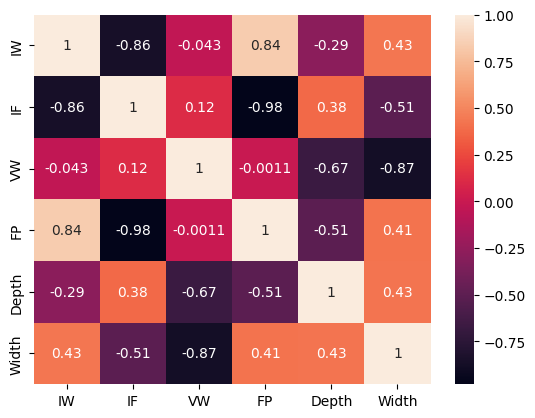

In [57]:
sns.heatmap(df.corr(), annot=True)

# Подготовка датасета

In [58]:
X = df.drop(["Width", "Depth"], axis=1)  # убираем целевые переменные
Y = df[["Width", "Depth"]].copy()  # копируем, чтобы не трогать исходный датафрейм

In [59]:
X.describe()

,IW,IF,VW,FP
count,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333
std,1.678363,5.145763,2.061078,21.493530
min,43.000000,131.000000,4.500000,50.000000
25%,44.000000,139.000000,8.000000,60.000000
50%,45.500000,141.000000,9.000000,80.000000
75%,47.000000,146.000000,10.000000,80.000000
max,49.000000,150.000000,12.000000,125.000000


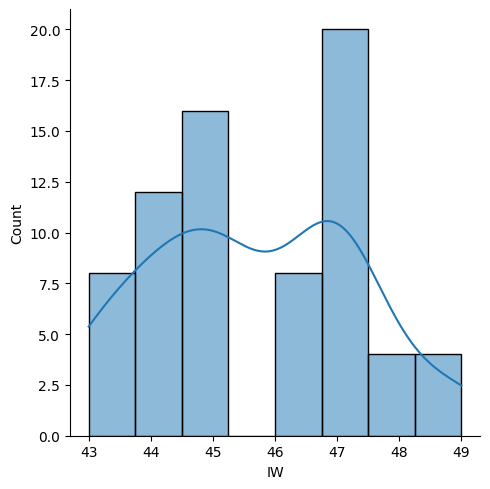

In [60]:
sns.displot(X.IW, kde=True)

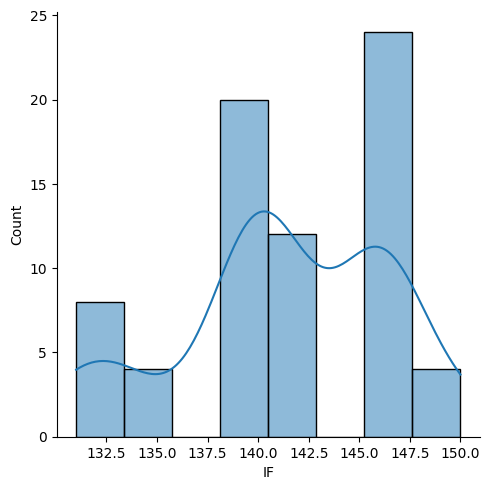

In [61]:
sns.displot(X.IF, kde=True)

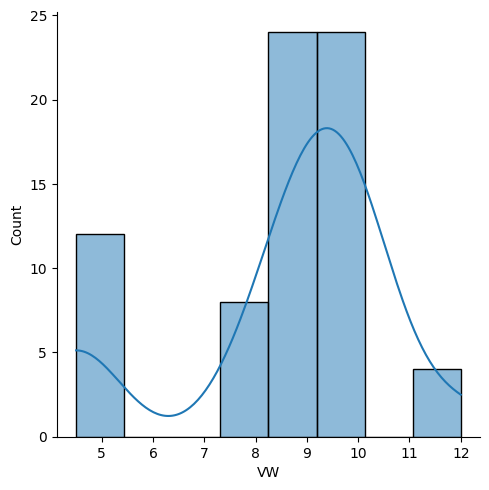

In [62]:
sns.displot(X.VW, kde=True)

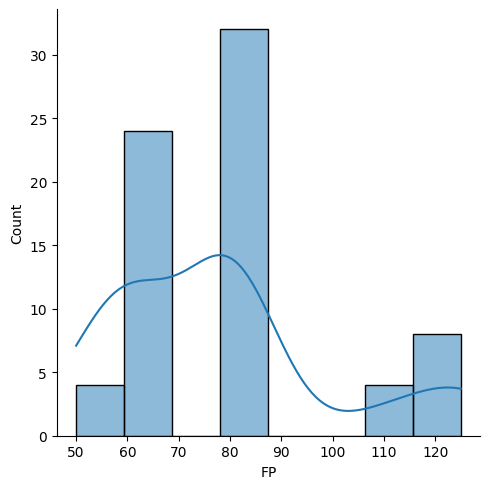

In [63]:
sns.displot(X.FP, kde=True)

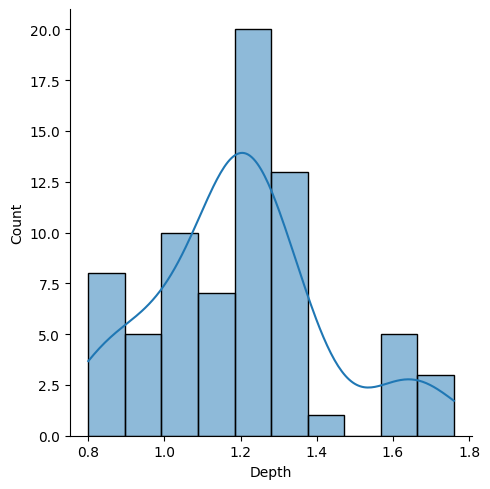

In [64]:
sns.displot(Y.Depth, kde=True)

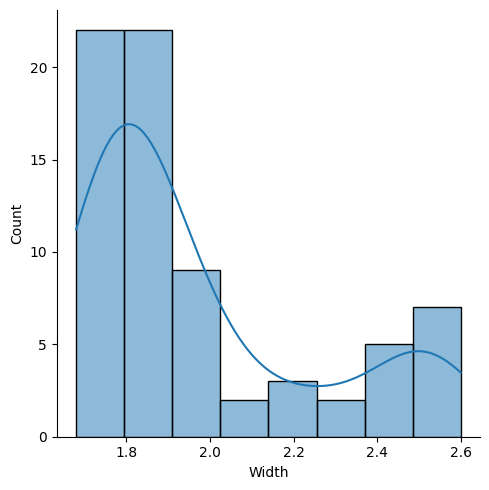

In [65]:
sns.displot(Y.Width, kde=True)

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True)

In [67]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
Y = Y.to_numpy()  # преобразовываем в массив NumPy

In [69]:
X_train.shape, Y_train.shape  # проверяем, что X_train и Y_train имеют одинаковое кол-во экземпляров и предсказуемую форму 

((57, 4), (57, 2))

# Создание модели

In [70]:
model = MultiOutputRegressor(tree.DecisionTreeRegressor())

# Обучение модели

In [71]:
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor())

# Оценка модели

In [72]:
mean_absolute_error(Y_test, model.predict(X_test), multioutput='raw_values')

array([0.05204444, 0.07893333])

In [73]:
Y_test.mean(axis=0)

Width    2.037333
Depth    1.200000
dtype: float64

In [78]:
r2_score(Y_test, model.predict(X_test), multioutput='raw_values')

array([0.94445876, 0.77520793])